In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
with tf.compat.v1.Session() as sess:
    hello = tf.constant("Hello Tensorflow")
    result = sess.run(hello)
    print(result)

b'Hello Tensorflow'


In [4]:
with tf.compat.v1.Session() as sess:
    
    matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)] , dtype = 'int32')
    matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)] , dtype = 'int32')

    matrix1 = tf.constant(matrix1)   
    matrix2 = tf.constant(matrix2)   

    matrix3 = np.array([(2,7,2),(1,4,2),(9,0,2)] , dtype= 'float32' )
    matrix_det = tf.linalg.det(matrix3)

    matrix_product = tf.matmul(matrix1 , matrix2)
    matrix_sum = tf.add(matrix1 , matrix2)

    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)

    print(result1)
    print(result2)
    print(result3)


[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
55.999992


In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 256s 22us/step


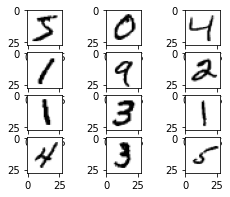

In [8]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [11]:
X_train.shape[0]

60000

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
#Create Keras Modal
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [16]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

In [30]:
from keras.utils.vis_utils import plot_model

plot_model(model, "AIUP_mnist.png", show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [31]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2)

Epoch 1/5
3000/3000 - 32s - loss: 0.3261 - accuracy: 0.9005 - val_loss: 0.1072 - val_accuracy: 0.9682 - 32s/epoch - 11ms/step
Epoch 2/5
3000/3000 - 29s - loss: 0.1638 - accuracy: 0.9504 - val_loss: 0.0857 - val_accuracy: 0.9758 - 29s/epoch - 10ms/step
Epoch 3/5
3000/3000 - 28s - loss: 0.1273 - accuracy: 0.9603 - val_loss: 0.0734 - val_accuracy: 0.9778 - 28s/epoch - 9ms/step
Epoch 4/5
3000/3000 - 28s - loss: 0.1053 - accuracy: 0.9672 - val_loss: 0.0899 - val_accuracy: 0.9739 - 28s/epoch - 9ms/step
Epoch 5/5
3000/3000 - 28s - loss: 0.0978 - accuracy: 0.9700 - val_loss: 0.0789 - val_accuracy: 0.9785 - 28s/epoch - 9ms/step


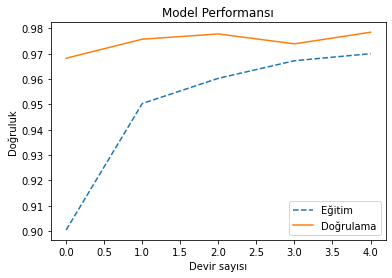

In [32]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "lower right")
plt.show()

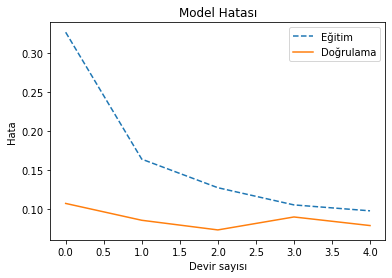

In [33]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [34]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test verisiyle model doğruluğu : %.2f" % (score[1] * 100))

Test verisiyle model doğruluğu : 97.92
